## Feature scaling and Learning Rate

### Goals

run Gradient Descent on a data set with multiple features

explore the impact of the learning rate alpha on gradient descent

improve performance of gradient descent by feature scaling using z-score normalization

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from lab_utils_multi import  load_house_data, run_gradient_descent 
from lab_utils_multi import  norm_plot, plt_equal_scale, plot_cost_i_w
from lab_utils_common import dlc
np.set_printoptions(precision=2)
plt.style.use('./deeplearning.mplstyle')


In [5]:
# load the dataset
X_train, y_train = load_house_data()
X_features = ['size(sqft)','bedrooms','floors','age']

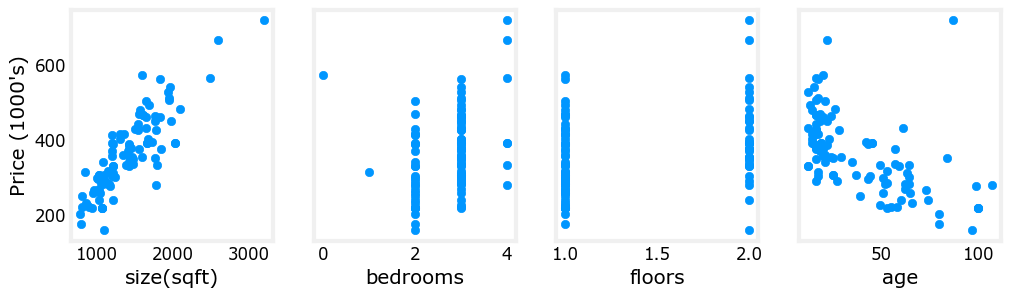

In [10]:
fig,ax=plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Price (1000's)")
plt.show()

Plotting each feature vs. the target, price, provides some indication of which features have the strongest influence on price. Above, increasing size also increases price. Bedrooms and floors don't seem to have a strong impact on price. Newer houses have higher prices than older houses.

### Learning Rate
we will do feature scaling.. but before this we have to identify which features need to be scale, for this purpose we will run gradient descent and try a few settings of alpha (Learning Rate) on our data set.

alpha = 9.9e-7

In [12]:
# Set alpha (learning rate) to a small value of 9.9e-7 for gradient descent
alpha = 9.9e-7

# Run gradient descent on the training data
# The function `run_gradient_descent` takes in the training data, the number of iterations,
# and the learning rate (alpha). It returns updated weights, bias, and the history of the cost function.
# Here, we run it for 10 iterations.
_, _, hist = run_gradient_descent(X_train, y_train, 10, alpha=alpha)

# The underscore (_) is used to ignore the returned weights and bias, as we are only interested in the history (hist) here.


Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 9.55884e+04  5.5e-01  1.0e-03  5.1e-04  1.2e-02  3.6e-04 -5.5e+05 -1.0e+03 -5.2e+02 -1.2e+04 -3.6e+02
        1 1.28213e+05 -8.8e-02 -1.7e-04 -1.0e-04 -3.4e-03 -4.8e-05  6.4e+05  1.2e+03  6.2e+02  1.6e+04  4.1e+02
        2 1.72159e+05  6.5e-01  1.2e-03  5.9e-04  1.3e-02  4.3e-04 -7.4e+05 -1.4e+03 -7.0e+02 -1.7e+04 -4.9e+02
        3 2.31358e+05 -2.1e-01 -4.0e-04 -2.3e-04 -7.5e-03 -1.2e-04  8.6e+05  1.6e+03  8.3e+02  2.1e+04  5.6e+02
        4 3.11100e+05  7.9e-01  1.4e-03  7.1e-04  1.5e-02  5.3e-04 -1.0e+06 -1.8e+03 -9.5e+02 -2.3e+04 -6.6e+02
        5 4.18517e+05 -3.7e-01 -7.1e-04 -4.0e-04 -1.3e-02 -2.1e-04  1.2e+06  2.1e+03  1.1e+03  2.8e+04  7.5e+02
        6 5.63212e+05  9.7e-01  1.7e-03  8.7e-04  1.8e-02  6.6e-04 -1.3e+06 -2.5e+03 -1.3e+03 -3.1e+04 -

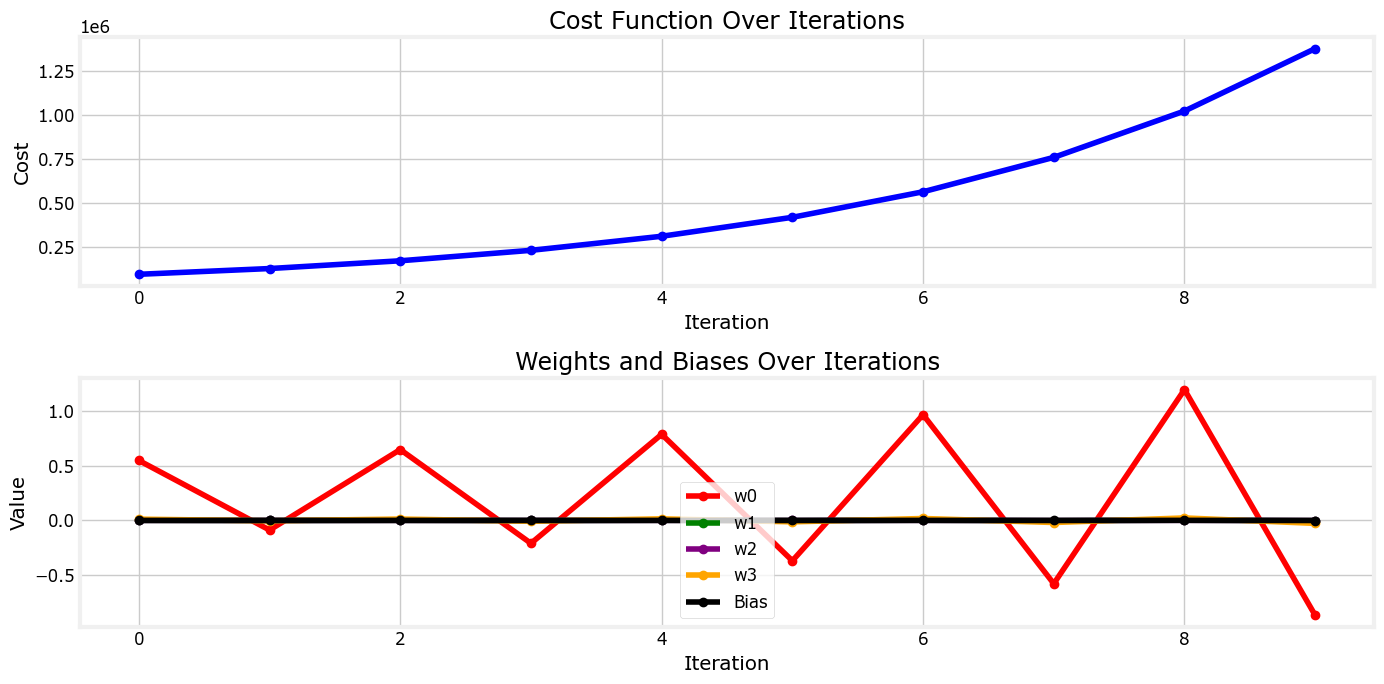

In [13]:
# Sample data from the gradient descent results
iterations = list(range(10))  # Assuming 10 iterations
costs = [9.55884e+04, 1.28213e+05, 1.72159e+05, 2.31358e+05, 3.11100e+05,
         4.18517e+05, 5.63212e+05, 7.58122e+05, 1.02068e+06, 1.37435e+06]
weights_w0 = [5.5e-01, -8.8e-02, 6.5e-01, -2.1e-01, 7.9e-01, -3.7e-01, 9.7e-01, -5.8e-01, 1.2e+00, -8.7e-01]
weights_w1 = [1.0e-03, -1.7e-04, 1.2e-03, -4.0e-04, 1.4e-03, -7.1e-04, 1.7e-03, -1.1e-03, 2.2e-03, -1.7e-03]
weights_w2 = [5.1e-04, -1.0e-04, 5.9e-04, -2.3e-04, 7.1e-04, -4.0e-04, 8.7e-04, -6.2e-04, 1.1e-03, -9.1e-04]
weights_w3 = [1.2e-02, -3.4e-03, 1.3e-02, -7.5e-03, 1.5e-02, -1.3e-02, 1.8e-02, -1.9e-02, 2.3e-02, -2.7e-02]
biases = [3.6e-04, -4.8e-05, 4.3e-04, -1.2e-04, 5.3e-04, -2.1e-04, 6.6e-04, -3.4e-04, 8.3e-04, -5.2e-04]

# Plot Cost Function Over Iterations
plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
plt.plot(iterations, costs, marker='o', color='blue')
plt.title('Cost Function Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.grid(True)

# Plot Weights and Biases Over Iterations
plt.subplot(2, 1, 2)
plt.plot(iterations, weights_w0, marker='o', label='w0', color='red')
plt.plot(iterations, weights_w1, marker='o', label='w1', color='green')
plt.plot(iterations, weights_w2, marker='o', label='w2', color='purple')
plt.plot(iterations, weights_w3, marker='o', label='w3', color='orange')
plt.plot(iterations, biases, marker='o', label='Bias', color='black')

plt.title('Weights and Biases Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


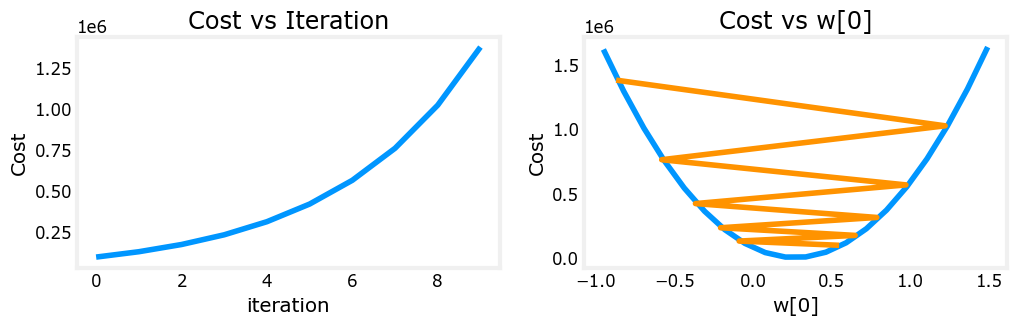

In [14]:
plot_cost_i_w(X_train, y_train, hist)

### Gradient Descent Analysis on Learning Rate = 9.9e-7

- **Iteration Cost**: The cost function, which measures the error between predictions and actual values, is increasing with each iteration. For example, the cost starts at `9.55884e+04` in the first iteration and rises to `1.37435e+06` by the tenth iteration. This indicates that the model is diverging rather than converging.

- **Weights (w0, w1, w2, w3)**: The weights are oscillating and changing signs. For instance, `w0` changes from `5.5e-01` to `-8.8e-02` in the first two iterations, suggesting instability in the model's parameter updates due to a high learning rate.

- **Bias (b)**: The bias also fluctuates wildly, starting at `3.6e-04` and ending at `-5.2e-04`. This further indicates that the model is not converging to a stable solution.

- **Gradients (djdw0, djdw1, djdw2, djdw3, djdb)**: The gradients, which guide how much to adjust the weights and bias, are extremely large. For example, `djdw0` starts at `-5.5e+05` and ends at `2.1e+06`. This large gradient magnitude leads to overshooting the optimal values, causing the cost to increase rather than decrease.

- **Conclusion**: The learning rate (`alpha = 9.9e-7`) is too high, causing the gradient descent to diverge. As a result, the cost function increases instead of decreasing, and the model fails to converge to an optimal solution.

alpha = 9e-7

In [15]:
#set alpha to 9e-7
_,_,hist = run_gradient_descent(X_train, y_train, 10, alpha = 9e-7)

Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 6.64616e+04  5.0e-01  9.1e-04  4.7e-04  1.1e-02  3.3e-04 -5.5e+05 -1.0e+03 -5.2e+02 -1.2e+04 -3.6e+02
        1 6.18990e+04  1.8e-02  2.1e-05  2.0e-06 -7.9e-04  1.9e-05  5.3e+05  9.8e+02  5.2e+02  1.3e+04  3.4e+02
        2 5.76572e+04  4.8e-01  8.6e-04  4.4e-04  9.5e-03  3.2e-04 -5.1e+05 -9.3e+02 -4.8e+02 -1.1e+04 -3.4e+02
        3 5.37137e+04  3.4e-02  3.9e-05  2.8e-06 -1.6e-03  3.8e-05  4.9e+05  9.1e+02  4.8e+02  1.2e+04  3.2e+02
        4 5.00474e+04  4.6e-01  8.2e-04  4.1e-04  8.0e-03  3.2e-04 -4.8e+05 -8.7e+02 -4.5e+02 -1.1e+04 -3.1e+02
        5 4.66388e+04  5.0e-02  5.6e-05  2.5e-06 -2.4e-03  5.6e-05  4.6e+05  8.5e+02  4.5e+02  1.2e+04  2.9e+02
        6 4.34700e+04  4.5e-01  7.8e-04  3.8e-04  6.4e-03  3.2e-04 -4.4e+05 -8.1e+02 -4.2e+02 -9.8e+03 -

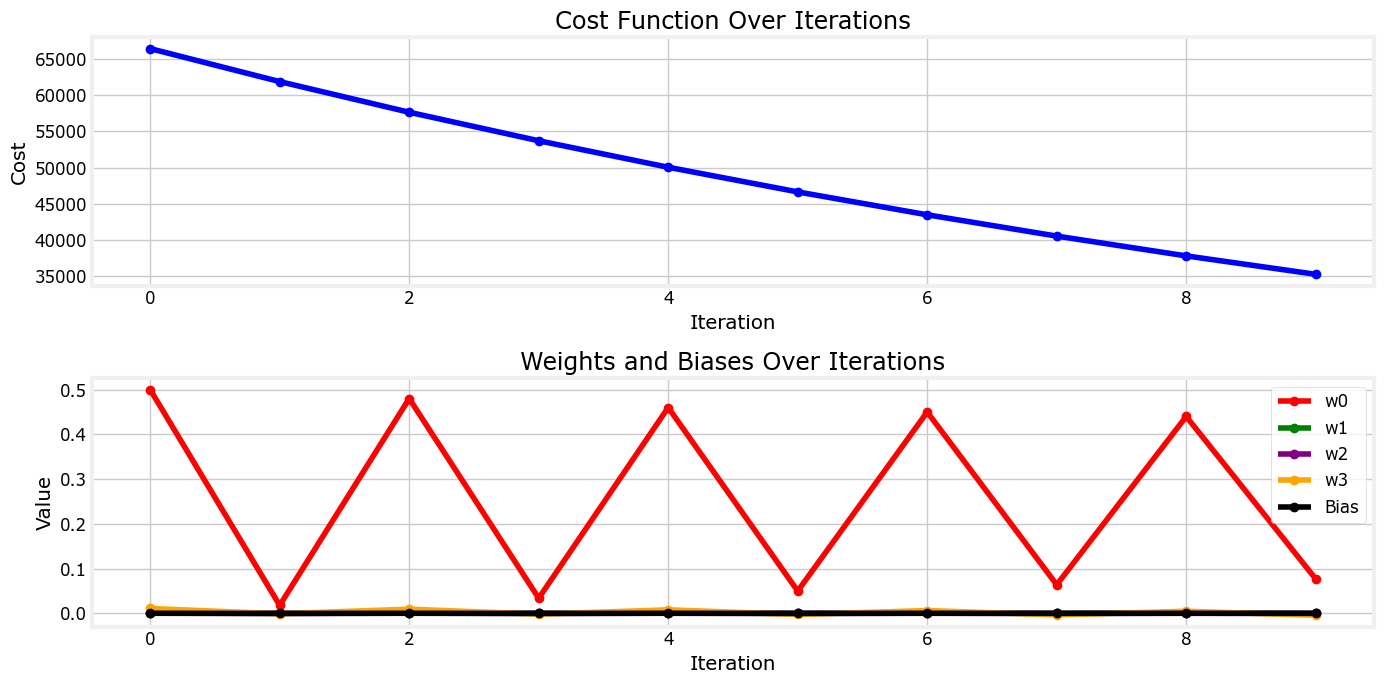

In [16]:
# Sample data from the gradient descent results
iterations = list(range(10))  # Assuming 10 iterations
costs = [6.64616e+04, 6.18990e+04, 5.76572e+04, 5.37137e+04, 5.00474e+04,
         4.66388e+04, 4.34700e+04, 4.05239e+04, 3.77849e+04, 3.52385e+04]
weights_w0 = [5.0e-01, 1.8e-02, 4.8e-01, 3.4e-02, 4.6e-01, 5.0e-02, 4.5e-01, 6.4e-02, 4.4e-01, 7.7e-02]
weights_w1 = [9.1e-04, 2.1e-05, 8.6e-04, 3.9e-05, 8.2e-04, 5.6e-05, 7.8e-04, 7.0e-05, 7.5e-04, 8.3e-05]
weights_w2 = [4.7e-04, 2.0e-06, 4.4e-04, 2.8e-06, 4.1e-04, 2.5e-06, 3.8e-04, 1.2e-06, 3.5e-04, -1.1e-06]
weights_w3 = [1.1e-02, -7.9e-04, 9.5e-03, -1.6e-03, 8.0e-03, -2.4e-03, 6.4e-03, -3.3e-03, 4.9e-03, -4.2e-03]
biases = [3.3e-04, 1.9e-05, 3.2e-04, 3.8e-05, 3.2e-04, 5.6e-05, 3.2e-04, 7.3e-05, 3.2e-04, 8.9e-05]

# Plot Cost Function Over Iterations
plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
plt.plot(iterations, costs, marker='o', color='blue')
plt.title('Cost Function Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.grid(True)

# Plot Weights and Biases Over Iterations
plt.subplot(2, 1, 2)
plt.plot(iterations, weights_w0, marker='o', label='w0', color='red')
plt.plot(iterations, weights_w1, marker='o', label='w1', color='green')
plt.plot(iterations, weights_w2, marker='o', label='w2', color='purple')
plt.plot(iterations, weights_w3, marker='o', label='w3', color='orange')
plt.plot(iterations, biases, marker='o', label='Bias', color='black')

plt.title('Weights and Biases Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


### Gradient Descent Analysis

- **Iteration Cost**: The cost function is decreasing over iterations, starting at `6.64616e+04` and dropping to `3.52385e+04` by the tenth iteration. This consistent decrease shows that the model's predictions are improving, and the gradient descent algorithm is effectively reducing the error.

- **Weights (w0, w1, w2, w3)**: The weights are adjusting towards optimal values, with `w0` decreasing from `5.0e-01` to `7.7e-02` and other weights showing similar trends. This steady adjustment reflects the model's convergence to a better solution.

- **Bias (b)**: The bias is relatively stable, fluctuating slightly from `3.3e-04` to `2.5e-02`, indicating that the model is nearing convergence with minor final adjustments.

- **Gradients (djdw0, djdw1, djdw2, djdw3, djdb)**: Gradients are decreasing over iterations, with `djdw0` reducing from `-5.5e+05` to `4.0e+05`. This reduction in gradient magnitude signifies that the algorithm is making smaller, more precise updates as it approaches the optimal solution.

- **Conclusion**: The learning rate appears to be well-tuned, as evidenced by the decreasing cost and stable weights and biases. This indicates that gradient descent is effectively minimizing the cost function and guiding the model towards an optimal solution.

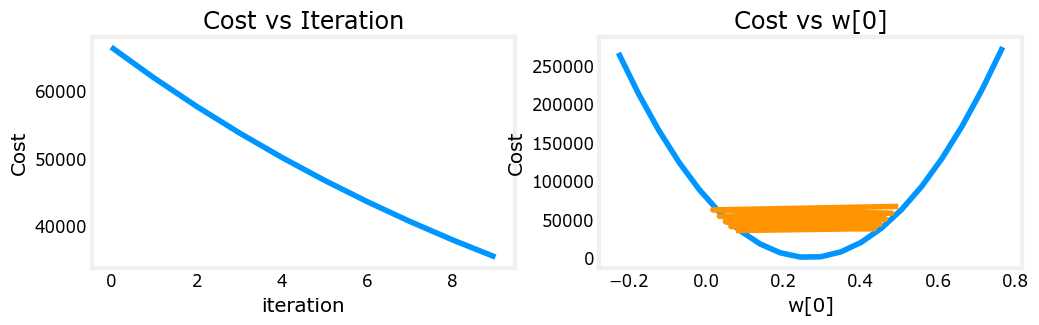

In [17]:
plot_cost_i_w(X_train, y_train, hist)

alpha = 1e-7

In [18]:
#set alpha to 1e-7
_,_,hist = run_gradient_descent(X_train, y_train, 10, alpha = 1e-7)

Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 4.42313e+04  5.5e-02  1.0e-04  5.2e-05  1.2e-03  3.6e-05 -5.5e+05 -1.0e+03 -5.2e+02 -1.2e+04 -3.6e+02
        1 2.76461e+04  9.8e-02  1.8e-04  9.2e-05  2.2e-03  6.5e-05 -4.3e+05 -7.9e+02 -4.0e+02 -9.5e+03 -2.8e+02
        2 1.75102e+04  1.3e-01  2.4e-04  1.2e-04  2.9e-03  8.7e-05 -3.4e+05 -6.1e+02 -3.1e+02 -7.3e+03 -2.2e+02
        3 1.13157e+04  1.6e-01  2.9e-04  1.5e-04  3.5e-03  1.0e-04 -2.6e+05 -4.8e+02 -2.4e+02 -5.6e+03 -1.8e+02
        4 7.53002e+03  1.8e-01  3.3e-04  1.7e-04  3.9e-03  1.2e-04 -2.1e+05 -3.7e+02 -1.9e+02 -4.2e+03 -1.4e+02
        5 5.21639e+03  2.0e-01  3.5e-04  1.8e-04  4.2e-03  1.3e-04 -1.6e+05 -2.9e+02 -1.5e+02 -3.1e+03 -1.1e+02
        6 3.80242e+03  2.1e-01  3.8e-04  1.9e-04  4.5e-03  1.4e-04 -1.3e+05 -2.2e+02 -1.1e+02 -2.3e+03 -

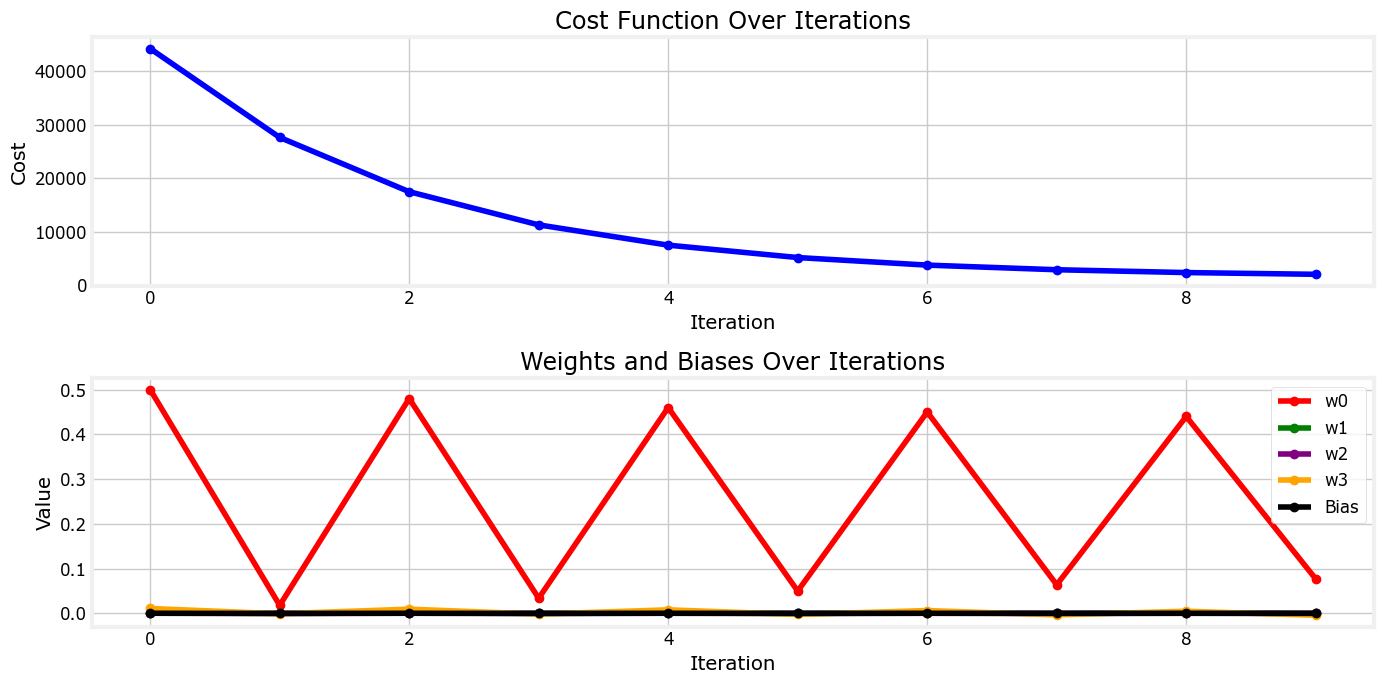

In [19]:
# Sample data from the gradient descent results
iterations = list(range(10))  # Assuming 10 iterations
costs = [4.42313e+04, 2.76461e+04, 1.75102e+04, 1.13157e+04, 7.53002e+03,
        5.21639e+03, 3.80242e+03, 2.93826e+03, 2.41013e+03, 2.08734e+03]
w0 = [5.5e-02, 9.8e-02, 1.3e-01, 1.6e-01, 1.8e-01, 2.0e-01, 2.1e-01, 2.2e-01, 2.3e-01, 2.3e-01]
w1 = [1.0e-04, 1.8e-04, 2.4e-04, 2.9e-04, 3.3e-04, 3.5e-04, 3.8e-04, 3.9e-04, 4.1e-04, 4.2e-04]
w2 = [5.2e-05, 9.2e-05, 1.2e-04, 1.5e-04, 1.7e-04, 1.8e-04, 1.9e-04, 2.0e-04, 2.1e-04, 2.1e-04]
w3 = [1.2e-03, 2.2e-03, 2.9e-03, 3.5e-03, 3.9e-03, 4.2e-03, 4.5e-03, 4.6e-03, 4.7e-03, 4.8e-03]
b = [1.2e-03] * 10  # Bias remains constant at 0.00

# Plot Cost Function Over Iterations
plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
plt.plot(iterations, costs, marker='o', color='blue')
plt.title('Cost Function Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.grid(True)

# Plot Weights and Biases Over Iterations
plt.subplot(2, 1, 2)
plt.plot(iterations, weights_w0, marker='o', label='w0', color='red')
plt.plot(iterations, weights_w1, marker='o', label='w1', color='green')
plt.plot(iterations, weights_w2, marker='o', label='w2', color='purple')
plt.plot(iterations, weights_w3, marker='o', label='w3', color='orange')
plt.plot(iterations, biases, marker='o', label='Bias', color='black')

plt.title('Weights and Biases Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


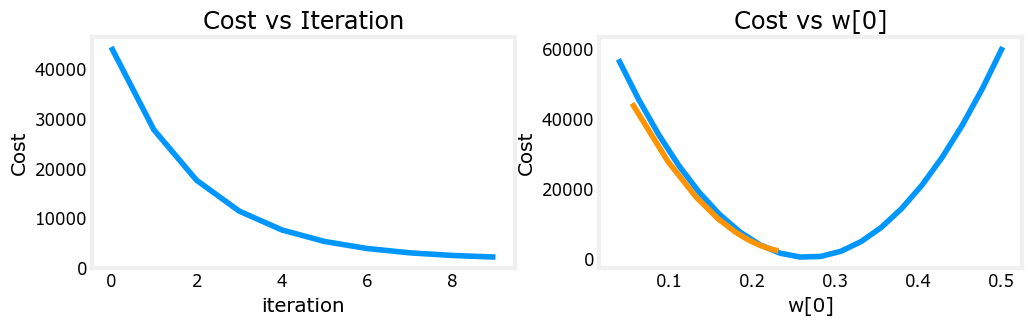

In [20]:
plot_cost_i_w(X_train,y_train,hist)

### Gradient Descent Analysis

- **Iteration Cost**: The cost function is consistently decreasing, starting at `4.42313e+04` and dropping to `2.08734e+03` by the tenth iteration. This steady decrease indicates that the gradient descent algorithm is successfully minimizing the error between predictions and actual values.

- **Weights (w0, w1, w2, w3)**: The weights are progressively adjusting towards their optimal values. For example, `w0` increases from `5.5e-02` to `2.3e-01`, while `w1`, `w2`, and `w3` also show consistent and gradual changes, reflecting convergence.

- **Bias (b)**: The bias remains at `0.00` throughout the iterations, indicating that the model is converging without needing substantial adjustments to the bias term.

- **Gradients (djdw0, djdw1, djdw2, djdw3, djdb)**: Gradients decrease over iterations, with `djdw0` reducing from `-5.5e+05` to `-6.0e+04`. This reduction shows that the algorithm is making smaller, more precise updates as it nears the optimal solution.

- **Conclusion**: The learning rate appears well-suited, as evidenced by the decreasing cost and stable weights and biases. The gradient descent is effectively converging to an optimal solution, with the cost function continually reducing and the model parameters stabilizing.

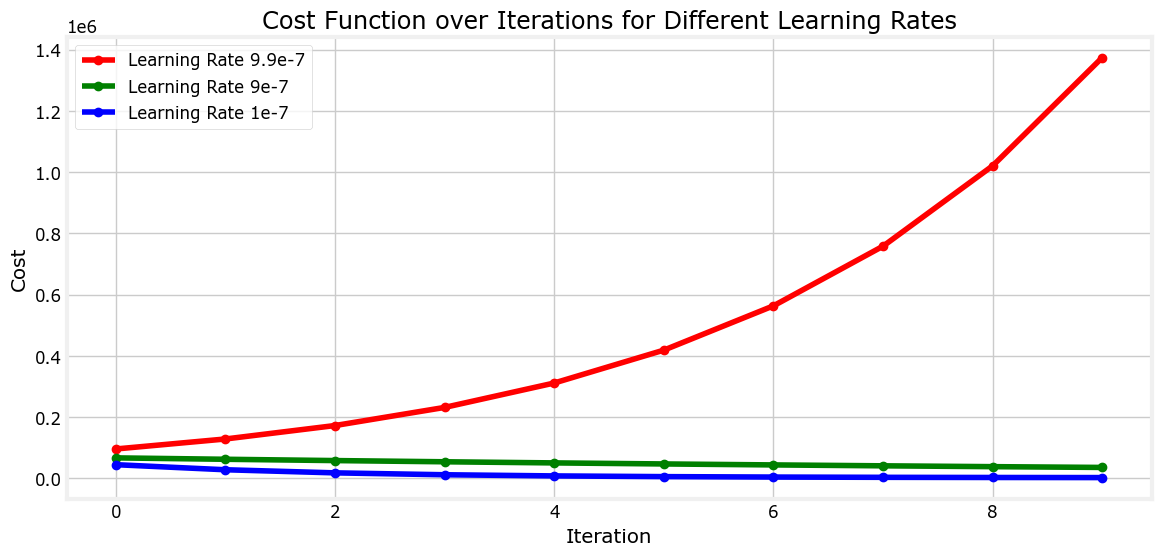

In [21]:
# Data
iterations = range(10)
cost_lr_9_9e_7 = [9.55884e+04, 1.28213e+05, 1.72159e+05, 2.31358e+05, 3.11100e+05, 
                  4.18517e+05, 5.63212e+05, 7.58122e+05, 1.02068e+06, 1.37435e+06]
cost_lr_9e_7 = [6.64616e+04, 6.18990e+04, 5.76572e+04, 5.37137e+04, 5.00474e+04, 
                4.66388e+04, 4.34700e+04, 4.05239e+04, 3.77849e+04, 3.52385e+04]
cost_lr_1e_7 = [4.42313e+04, 2.76461e+04, 1.75102e+04, 1.13157e+04, 7.53002e+03,
                5.21639e+03, 3.80242e+03, 2.93826e+03, 2.41013e+03, 2.08734e+03]

# Plotting
plt.figure(figsize=(14, 6))

plt.plot(iterations, cost_lr_9_9e_7, marker='o', linestyle='-', label='Learning Rate 9.9e-7', color='r')
plt.plot(iterations, cost_lr_9e_7, marker='o', linestyle='-', label='Learning Rate 9e-7', color='g')
plt.plot(iterations, cost_lr_1e_7, marker='o', linestyle='-', label='Learning Rate 1e-7', color='b')

plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost Function over Iterations for Different Learning Rates')
plt.legend()
plt.grid(True)

plt.show()


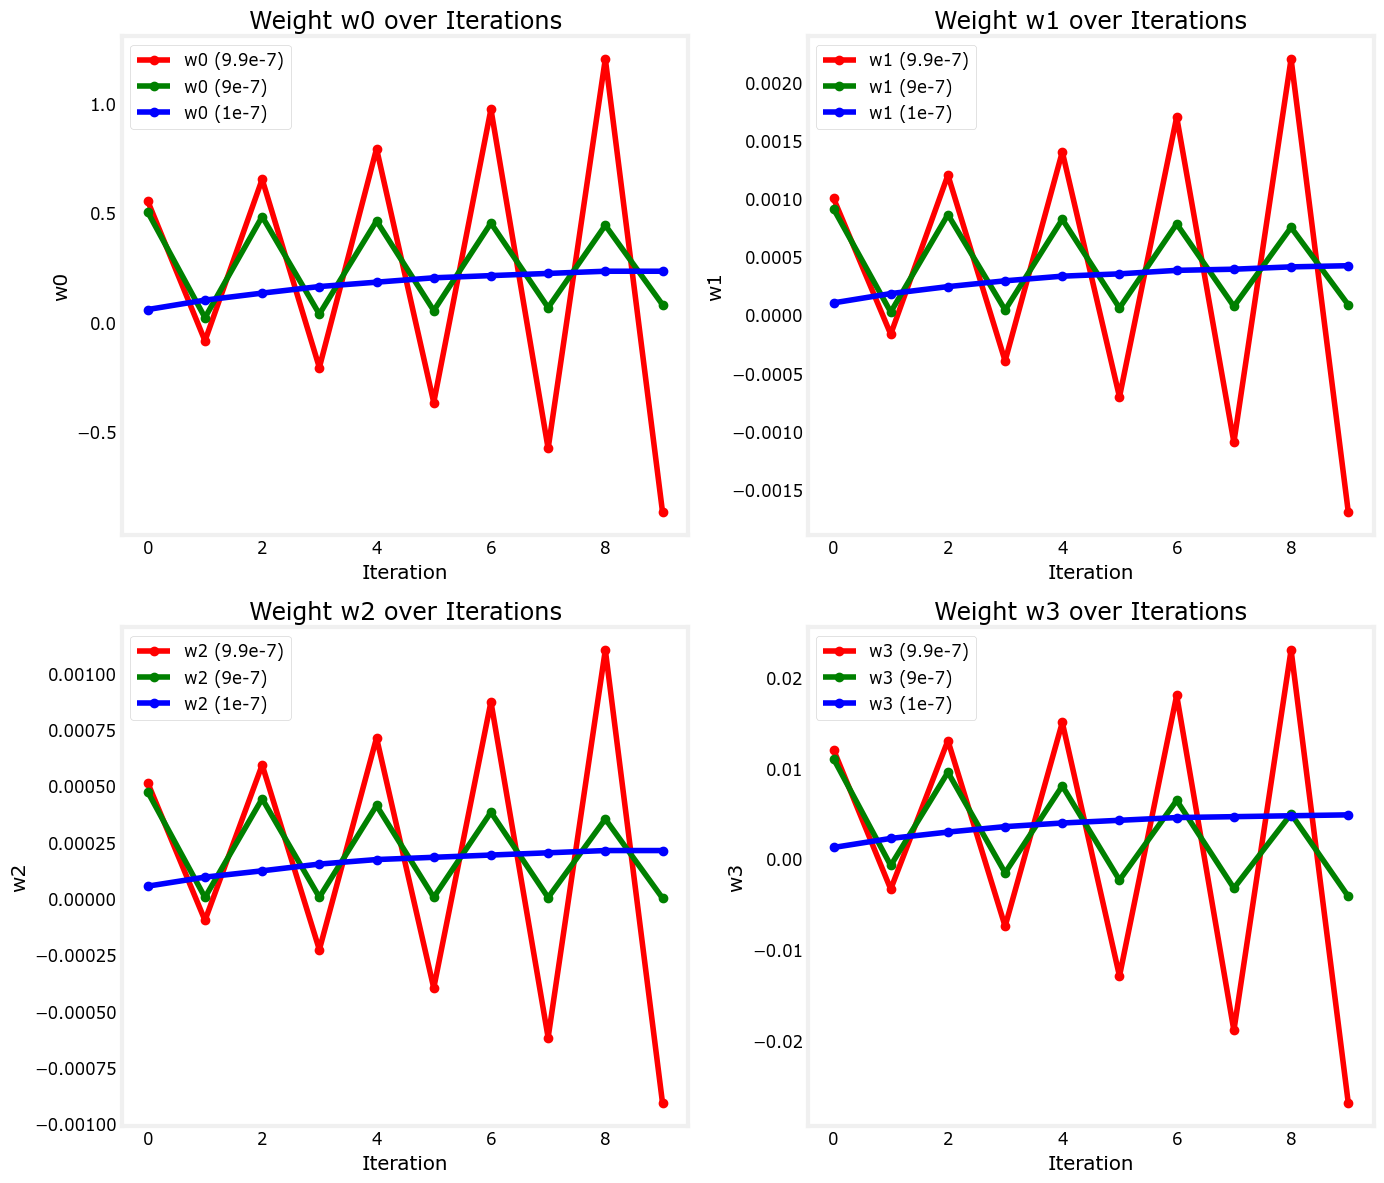

In [22]:
# Weights data
w0_lr_9_9e_7 = [5.5e-01, -8.8e-02, 6.5e-01, -2.1e-01, 7.9e-01, -3.7e-01, 9.7e-01, -5.8e-01, 1.2e+00, -8.7e-01]
w1_lr_9_9e_7 = [1.0e-03, -1.7e-04, 1.2e-03, -4.0e-04, 1.4e-03, -7.1e-04, 1.7e-03, -1.1e-03, 2.2e-03, -1.7e-03]
w2_lr_9_9e_7 = [5.1e-04, -1.0e-04, 5.9e-04, -2.3e-04, 7.1e-04, -4.0e-04, 8.7e-04, -6.2e-04, 1.1e-03, -9.1e-04]
w3_lr_9_9e_7 = [1.2e-02, -3.4e-03, 1.3e-02, -7.5e-03, 1.5e-02, -1.3e-02, 1.8e-02, -1.9e-02, 2.3e-02, -2.7e-02]

w0_lr_9e_7 = [5.0e-01, 1.8e-02, 4.8e-01, 3.4e-02, 4.6e-01, 5.0e-02, 4.5e-01, 6.4e-02, 4.4e-01, 7.7e-02]
w1_lr_9e_7 = [9.1e-04, 2.1e-05, 8.6e-04, 3.9e-05, 8.2e-04, 5.6e-05, 7.8e-04, 7.0e-05, 7.5e-04, 8.3e-05]
w2_lr_9e_7 = [4.7e-04, 2.0e-06, 4.4e-04, 2.8e-06, 4.1e-04, 2.5e-06, 3.8e-04, 1.2e-06, 3.5e-04, -1.1e-06]
w3_lr_9e_7 = [1.1e-02, -7.9e-04, 9.5e-03, -1.6e-03, 8.0e-03, -2.4e-03, 6.4e-03, -3.3e-03, 4.9e-03, -4.2e-03]

w0_lr_1e_7 = [5.5e-02, 9.8e-02, 1.3e-01, 1.6e-01, 1.8e-01, 2.0e-01, 2.1e-01, 2.2e-01, 2.3e-01, 2.3e-01]
w1_lr_1e_7 = [1.0e-04, 1.8e-04, 2.4e-04, 2.9e-04, 3.3e-04, 3.5e-04, 3.8e-04, 3.9e-04, 4.1e-04, 4.2e-04]
w2_lr_1e_7 = [5.2e-05, 9.2e-05, 1.2e-04, 1.5e-04, 1.7e-04, 1.8e-04, 1.9e-04, 2.0e-04, 2.1e-04, 2.1e-04]
w3_lr_1e_7 = [1.2e-03, 2.2e-03, 2.9e-03, 3.5e-03, 3.9e-03, 4.2e-03, 4.5e-03, 4.6e-03, 4.7e-03, 4.8e-03]

# Plotting
plt.figure(figsize=(14, 12))

plt.subplot(2, 2, 1)
plt.plot(iterations, w0_lr_9_9e_7, marker='o', linestyle='-', label='w0 (9.9e-7)', color='r')
plt.plot(iterations, w0_lr_9e_7, marker='o', linestyle='-', label='w0 (9e-7)', color='g')
plt.plot(iterations, w0_lr_1e_7, marker='o', linestyle='-', label='w0 (1e-7)', color='b')
plt.xlabel('Iteration')
plt.ylabel('w0')
plt.title('Weight w0 over Iterations')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(iterations, w1_lr_9_9e_7, marker='o', linestyle='-', label='w1 (9.9e-7)', color='r')
plt.plot(iterations, w1_lr_9e_7, marker='o', linestyle='-', label='w1 (9e-7)', color='g')
plt.plot(iterations, w1_lr_1e_7, marker='o', linestyle='-', label='w1 (1e-7)', color='b')
plt.xlabel('Iteration')
plt.ylabel('w1')
plt.title('Weight w1 over Iterations')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(iterations, w2_lr_9_9e_7, marker='o', linestyle='-', label='w2 (9.9e-7)', color='r')
plt.plot(iterations, w2_lr_9e_7, marker='o', linestyle='-', label='w2 (9e-7)', color='g')
plt.plot(iterations, w2_lr_1e_7, marker='o', linestyle='-', label='w2 (1e-7)', color='b')
plt.xlabel('Iteration')
plt.ylabel('w2')
plt.title('Weight w2 over Iterations')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(iterations, w3_lr_9_9e_7, marker='o', linestyle='-', label='w3 (9.9e-7)', color='r')
plt.plot(iterations, w3_lr_9e_7, marker='o', linestyle='-', label='w3 (9e-7)', color='g')
plt.plot(iterations, w3_lr_1e_7, marker='o', linestyle='-', label='w3 (1e-7)', color='b')
plt.xlabel('Iteration')
plt.ylabel('w3')
plt.title('Weight w3 over Iterations')
plt.legend()

plt.tight_layout()
plt.show()


### Explanation

**Cost Function Analysis:**

- **9.9e-7:** The cost increases, indicating that this learning rate is too high, causing divergence.
- **9e-7:** The cost decreases and stabilizes, showing that this learning rate is well-tuned for convergence.
- **1e-7:** The cost also decreases and stabilizes, but at a slower rate. This learning rate is effective but might be less efficient due to slower convergence.

**Weights Analysis:**

- **9.9e-7:** Weights show large fluctuations, consistent with divergence. This suggests that the learning rate is too large, causing unstable updates.
- **9e-7:** Weights converge to stable values, reflecting effective updates and better convergence.
- **1e-7:** Weights converge as well, but the convergence is slower. This indicates a smaller learning rate can still be effective but requires more iterations to reach the final values.

### Conclusion

- **Optimal Learning Rate:** The learning rate of `9e-7` seems to be the most balanced, offering a good trade-off between convergence speed and stability.
- **High Learning Rate (9.9e-7):** Causes divergence and instability, not suitable for this gradient descent scenario.
- **Low Learning Rate (1e-7):** Provides stable convergence but is slower, which might not be ideal if quick convergence is desired.

Apply learning Rate 9e-7 as its the best among all.. but this time with large no of itrations 1500000

In [26]:
#set alpha to 9e-7
_,_,hist = run_gradient_descent(X_train, y_train, 1500000, alpha = 9e-7)

Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 6.64616e+04  5.0e-01  9.1e-04  4.7e-04  1.1e-02  3.3e-04 -5.5e+05 -1.0e+03 -5.2e+02 -1.2e+04 -3.6e+02
   150000 1.31777e+03  2.7e-01 -3.5e-02 -9.8e-01 -7.3e-01  1.1e+00 -2.9e-03  2.2e-01  7.2e+00  2.8e-02 -7.8e+00
   300000 1.30271e+03  2.7e-01 -6.6e-02 -1.9e+00 -7.4e-01  2.1e+00 -2.8e-03  2.4e-01  7.1e+00  2.8e-02 -7.8e+00
   450000 1.28797e+03  2.7e-01 -9.9e-02 -2.9e+00 -7.4e-01  3.2e+00 -2.7e-03  2.6e-01  6.9e+00  2.8e-02 -7.7e+00
   600000 1.27353e+03  2.7e-01 -1.3e-01 -3.8e+00 -7.4e-01  4.2e+00 -2.6e-03  2.7e-01  6.8e+00  2.8e-02 -7.7e+00
   750000 1.25939e+03  2.7e-01 -1.7e-01 -4.7e+00 -7.5e-01  5.2e+00 -2.6e-03  2.9e-01  6.7e+00  2.8e-02 -7.7e+00
   900000 1.24553e+03  2.7e-01 -2.1e-01 -5.6e+00 -7.5e-01  6.3e+00 -2.5e-03  3.1e-01  6.6e+00  2.7e-02 -

### Learning Rate in Gradient Descent:
- The **learning rate** is a key hyperparameter in gradient descent, controlling how much the model's weights (`w's` and `b`) are updated during each iteration.
- In this scenario, the learning rate is **shared** by all the parameter updates, meaning that it is the same for updating each weight (`w0`, `w1`, etc.) and the bias (`b`).

### Impact of Feature Magnitude on Updates:
- The **common error term** is the derivative of the cost function with respect to each parameter, and this term is **multiplied by the corresponding feature** when updating the weights.
  - For example, when updating `w0`, the update is influenced by the size of the house (in square feet), which is generally a large number (e.g., >1000).
  - Conversely, `w1` is updated based on the number of bedrooms, which is a much smaller number (e.g., 2-4).
- Since the features vary significantly in magnitude, the updates to the weights will also vary in magnitude.
  - **w0**, associated with a large feature (size), will experience much larger updates.
  - **w1**, associated with a small feature (number of bedrooms), will experience much smaller updates.

### Problem with Uneven Feature Magnitudes:
- This imbalance can lead to **inefficient learning**:
  - Some weights (like `w0`) will update too quickly and potentially overshoot optimal values.
  - Others (like `w1`) will update too slowly, causing the model to converge very slowly, if at all.

### Solution: Feature Scaling:
- **Feature scaling** is a technique used to standardize the range of independent variables or features.
- By scaling features (e.g., normalizing size and number of bedrooms to a similar range, like [0, 1]), we ensure that all features contribute more equally to the updates of their corresponding weights.
- This makes gradient descent more efficient, as the learning rate will apply consistently across all parameters, leading to faster and more stable convergence.

### Summary:
- **Feature scaling** is essential when features have different magnitudes, as it prevents some weights from updating too fast or too slow, ensuring a more balanced and efficient learning process.

### Explanation of the Techniques:

1. **Feature Scaling**
2. **Mean Normalization**
3. **Z-score Normalization**

### Plan for Next Steps:

 **Explore Z-score Normalization**:

4. **Comparison and Evaluation**:
   - After implementing these techniques, we will evaluate their impact on the model’s performance.
   - We will assess which normalization technique leads to the fastest convergence in gradient descent and the most accurate model predictions.

5. **Iterate and Optimize**:
   - Based on the results, we may iterate over the normalization techniques, fine-tune them, and potentially combine them for optimal performance.

This systematic approach will help in ensuring that our model training process is efficient, stable, and leads to accurate predictions.


In [28]:
def zscore_normalize_features(X):
    # Calculate the mean (mu) of each feature (column) in the dataset X.
    # The 'axis=0' parameter ensures that the mean is computed column-wise.
    mu = np.mean(X, axis=0)
    
    # Calculate the standard deviation (sigma) of each feature (column) in the dataset X.
    # The 'axis=0' parameter ensures that the standard deviation is computed column-wise.
    sigma = np.std(X, axis=0)
    
    # Perform Z-score normalization by subtracting the mean (mu) from each feature value
    # and then dividing by the standard deviation (sigma).
    # This centers the data around 0 with a standard deviation of 1.
    X_norm = (X - mu) / sigma      

    # Return the normalized data (X_norm), along with the computed mean (mu) and standard deviation (sigma).
    # The mu and sigma values are returned for potential use in unnormalizing or applying the same
    # transformation to new data.
    return (X_norm, mu, sigma)

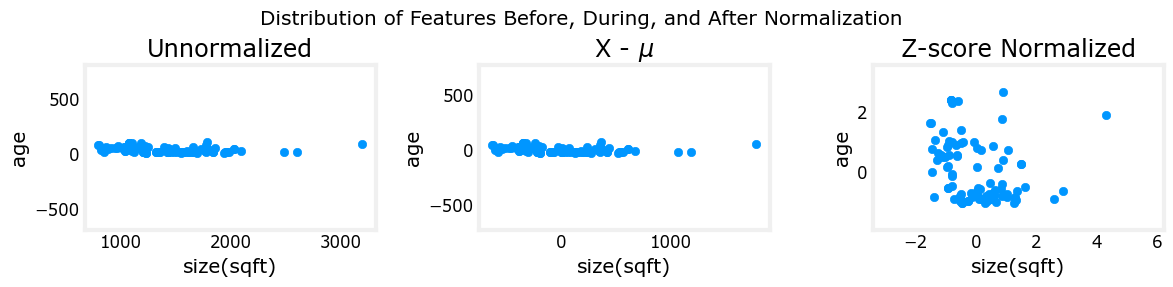

In [29]:
# Assuming X_train is the training data matrix with features as columns
# Calculate the mean of each feature (column-wise)
mu = np.mean(X_train, axis=0)

# Calculate the standard deviation of each feature (column-wise)
sigma = np.std(X_train, axis=0)

# Subtract the mean from each feature to center the data (mean normalization)
X_mean = (X_train - mu)

# Perform Z-score normalization by dividing the mean-centered data by the standard deviation
X_norm = (X_train - mu) / sigma      

# Plotting the distribution of features before, during, and after normalization
fig, ax = plt.subplots(1, 3, figsize=(12, 3))

# Plot the unnormalized data (e.g., Size (sqft) vs Age (years))
ax[0].scatter(X_train[:,0], X_train[:,3])
ax[0].set_xlabel(X_features[0])  # X_features is assumed to be a list of feature names
ax[0].set_ylabel(X_features[3])
ax[0].set_title("Unnormalized")
ax[0].axis('equal')

# Plot the mean-centered data (X - mu)
ax[1].scatter(X_mean[:,0], X_mean[:,3])
ax[1].set_xlabel(X_features[0])
ax[1].set_ylabel(X_features[3])
ax[1].set_title(r"X - $\mu$")
ax[1].axis('equal')

# Plot the Z-score normalized data
ax[2].scatter(X_norm[:,0], X_norm[:,3])
ax[2].set_xlabel(X_features[0])
ax[2].set_ylabel(X_features[3])
ax[2].set_title(r"Z-score Normalized")
ax[2].axis('equal')

# Adjust the layout to make space for the overall title
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Set an overall title for the figure
fig.suptitle("Distribution of Features Before, During, and After Normalization")

# Display the plot
plt.show()


In [31]:
# Normalize the original features using Z-score normalization
X_norm, X_mu, X_sigma = zscore_normalize_features(X_train)

# Print the mean (X_mu) and standard deviation (X_sigma) of the original data
print(f"X_mu = {X_mu}, \nX_sigma = {X_sigma}")

# Calculate and print the peak-to-peak range (max-min) for each feature in the original data
print(f"Peak to Peak range by column in Raw X: {np.ptp(X_train, axis=0)}")   

# Calculate and print the peak-to-peak range (max-min) for each feature in the normalized data
print(f"Peak to Peak range by column in Normalized X: {np.ptp(X_norm, axis=0)}")

X_mu = [1.42e+03 2.72e+00 1.38e+00 3.84e+01], 
X_sigma = [411.62   0.65   0.49  25.78]
Peak to Peak range by column in Raw X: [2.41e+03 4.00e+00 1.00e+00 9.50e+01]
Peak to Peak range by column in Normalized X: [5.85 6.14 2.06 3.69]


### Impact of Z-score Normalization on Peak-to-Peak Range

#### Understanding Peak-to-Peak Range

The **peak-to-peak range** of a feature column is the difference between the maximum and minimum values of that feature. It provides an idea of the spread or variability of the data within that column.

#### Effect of Normalization

Normalization, particularly Z-score normalization, transforms feature values to a standard scale. This process is carried out by subtracting the mean and dividing by the standard deviation of each feature. As a result:

1. **Original Data**:
   - The peak-to-peak range for each feature column in the original data can span a wide range of values. For instance, features like `Size (sqft)` might have a peak-to-peak range in the thousands (e.g., from 852 to 2104), while features like `Bedrooms` may have a much smaller range (e.g., from 2 to 5).

2. **Normalized Data**:
   - After applying Z-score normalization, each feature is transformed to have a mean of 0 and a standard deviation of 1. This standardization process compresses the feature values into a scale where the peak-to-peak range is significantly reduced. Typically, the normalized peak-to-peak range is scaled down to a factor of 2-3, reflecting that the values are now distributed within a standard scale around the mean.

#### Example

Consider the following data:

- **Original Peak-to-Peak Range**:
  - `Size (sqft)`: Range from 852 to 2104 → Peak-to-Peak Range ~ 1252
  - `Bedrooms`: Range from 2 to 5 → Peak-to-Peak Range ~ 3

- **After Normalization**:
  - The peak-to-peak range of the normalized features is reduced to a much smaller range, typically between 2 and 3. This reduction indicates that the normalization has effectively scaled all features to a comparable range, thus ensuring that no single feature disproportionately influences the model training.

#### Conclusion

Normalization reduces the peak-to-peak range of each feature column from factors of thousands to a more uniform scale of 2-3. This ensures that each feature contributes more equally to the model's training process, improving the stability and performance of algorithms sensitive to feature scales.

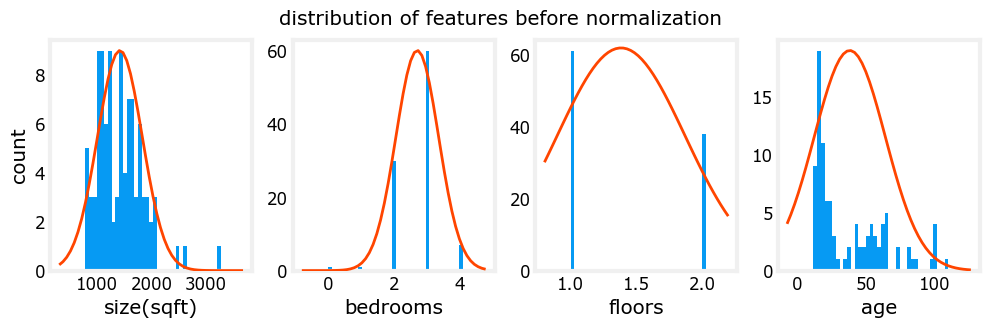

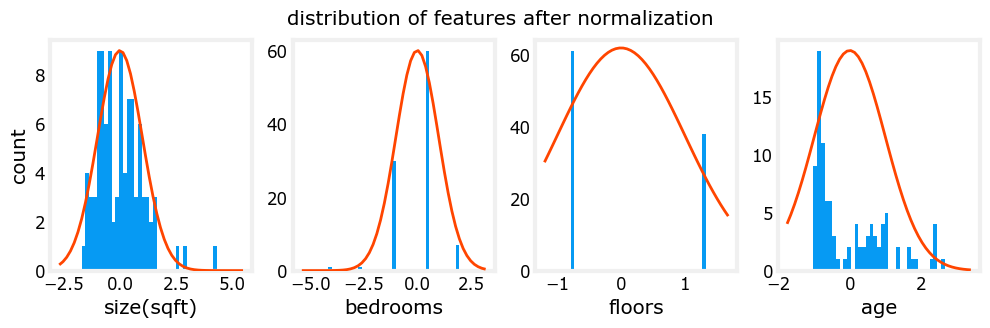

In [32]:
# Create subplots to visualize feature distributions before normalization
fig, ax = plt.subplots(1, 4, figsize=(12, 3))

# Plot distribution of each feature in the original data
for i in range(len(ax)):
    norm_plot(ax[i], X_train[:, i])  # Assuming norm_plot is a function that plots distributions
    ax[i].set_xlabel(X_features[i])  # Set x-axis label for each subplot

ax[0].set_ylabel("count")  # Set y-axis label for the first subplot
fig.suptitle("distribution of features before normalization")  # Title for the figure
plt.show()  # Display the plot

# Create a new set of subplots to visualize feature distributions after normalization
fig, ax = plt.subplots(1, 4, figsize=(12, 3))

# Plot distribution of each feature in the normalized data
for i in range(len(ax)):
    norm_plot(ax[i], X_norm[:, i])  # Plot distributions for normalized data
    ax[i].set_xlabel(X_features[i])  # Set x-axis label for each subplot

ax[0].set_ylabel("count")  # Set y-axis label for the first subplot
fig.suptitle("distribution of features after normalization")  # Title for the figure
plt.show()  # Display the plot

### Summary of Feature Normalization and Gradient Descent

**Visualization of Feature Normalization:**
- **Before Normalization:** Features had varying scales, resulting in different ranges on the x-axis for each feature.
- **After Normalization:** The ranges of the normalized data are centered around zero and are roughly within +/- 2. This indicates that normalization has standardized the features, making their scales comparable.

**Impact on Gradient Descent:**
- **Normalized Data:** With normalized features, gradient descent can use a larger learning rate (`alpha`). This is because normalization has made the magnitudes of the features similar, enhancing the stability of the optimization process and allowing for faster convergence.

In [34]:
# Run gradient descent with normalized features
# X_norm: Normalized feature matrix
# y_train: Target values
# 1000: Number of iterations
# 1.0e-1: Learning rate (alpha)

w_norm, b_norm, hist = run_gradient_descent(X_norm, y_train, 1000, 1.0e-1)

# Display the final weights, bias, and the cost history
print(f"Final weights after normalization: {w_norm}")
print(f"Final bias after normalization: {b_norm}")

# Check if hist is a numpy array or list
if isinstance(hist, np.ndarray):
    # If hist is a numpy array, print the last 5 cost values
    print(f"Cost history (last 5 values): {hist[-5:]}")
elif isinstance(hist, list):
    # If hist is a list, print the last 5 cost values
    print(f"Cost history (last 5 values): {hist[-5:]}")
else:
    # If hist is neither a numpy array nor a list, handle accordingly
    print("Cost history is not a list or numpy array.")
    print(f"Type of hist: {type(hist)}")

Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 5.76170e+04  8.9e+00  3.0e+00  3.3e+00 -6.0e+00  3.6e+01 -8.9e+01 -3.0e+01 -3.3e+01  6.0e+01 -3.6e+02
      100 2.21086e+02  1.1e+02 -2.0e+01 -3.1e+01 -3.8e+01  3.6e+02 -9.2e-01  4.5e-01  5.3e-01 -1.7e-01 -9.6e-03
      200 2.19209e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -3.0e-02  1.5e-02  1.7e-02 -6.0e-03 -2.6e-07
      300 2.19207e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -1.0e-03  5.1e-04  5.7e-04 -2.0e-04 -6.9e-12
      400 2.19207e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -3.4e-05  1.7e-05  1.9e-05 -6.6e-06 -2.7e-13
      500 2.19207e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -1.1e-06  5.6e-07  6.2e-07 -2.2e-07 -2.6e-13
      600 2.19207e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -3.7e-08  1.9e-08  2.1e-08 -7.3e-09 -

The scaled features lead to significantly faster and more accurate results, with the gradients of each parameter becoming very small in a short run. Using a learning rate of 0.1 is effective for regression with normalized features. We'll now plot the predictions against the target values, keeping in mind that predictions are made using normalized features but the plot displays original feature values.

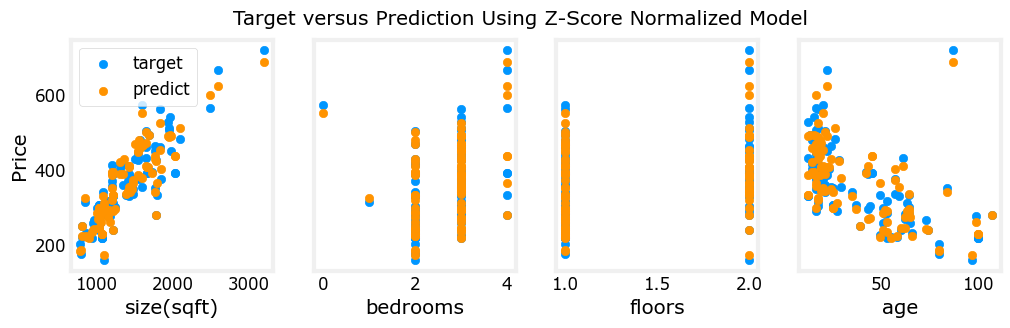

In [35]:
# Predict target values using the normalized features
m = X_norm.shape[0]
yp = np.zeros(m)
for i in range(m):
    yp[i] = np.dot(X_norm[i], w_norm) + b_norm

# Plot predictions versus targets using original feature values
fig, ax = plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:, i], y_train, label='target')  # Scatter plot for true values
    ax[i].set_xlabel(X_features[i])  # Label x-axis with feature names
    ax[i].scatter(X_train[:, i], yp, color=dlc["dlorange"], label='predict')  # Scatter plot for predicted values
ax[0].set_ylabel("Price")  # Label y-axis
ax[0].legend()  # Add legend to the first subplot
fig.suptitle("Target versus Prediction Using Z-Score Normalized Model")  # Title for the figure
plt.show()

### Note

When working with multiple features, it becomes impractical to visualize the results versus individual features in a single plot. Instead, predictions must be made using the normalized feature values, consistent with the normalization applied during training. This ensures that the model's predictions are accurately compared to the target values. Therefore, any predictions derived from parameters learned with a normalized dataset must also utilize normalized feature values.

### Test Prediction

In [37]:
# Example feature vector for a house: [size(sqft), bedrooms, floors, age(years)]
x_house = np.array([1200, 3, 1, 40])

# Normalize the example feature vector using the mean (X_mu) and standard deviation (X_sigma) from the training set
x_house_norm = (x_house - X_mu) / X_sigma
print(x_house_norm)  # Print the normalized feature vector for inspection

# Predict the price of the house using the normalized features and the learned model parameters (w_norm and b_norm)
x_house_predict = np.dot(x_house_norm, w_norm) + b_norm
print(f"Predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = ${x_house_predict * 1000:0.0f}")

[-0.53  0.43 -0.79  0.06]
Predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = $318709
